In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

/Users/aaron/Documents/code/Deep-Learning-AI/deeplearningai/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [38]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operator: str
    operator2: str
    finalNumber: int
    finalNumber2: int

In [43]:
def adder(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decider_node1(state: AgentState) -> str:
    if state['operator'] == '+':
        return 'add'
    elif state['operator'] == '-':
        return 'sub'

def decider_node2(state: AgentState) -> str:
    if state['operator2'] == '+':
        return 'add2'
    elif state['operator2'] == '-':
        return 'sub2'



In [44]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("adder2", adder2)
graph.add_node("subtractor2", subtractor2)
graph.add_node("router", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router", decider_node1,
    {
        "add": "adder",
        "sub": "subtractor"
    }
)

graph.add_edge("adder", "router2")
graph.add_edge("subtractor", "router2")
graph.add_conditional_edges("router2", decider_node2,
    {
        "add2": "adder2",
        "sub2": "subtractor2"
    }
)
graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)
app = graph.compile()

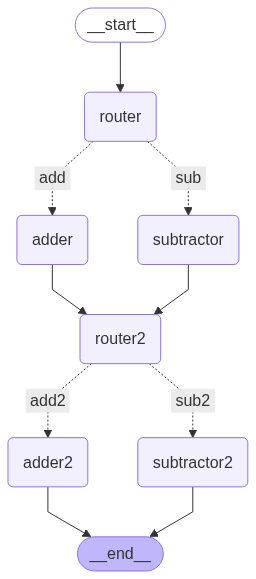

In [45]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [46]:
result = app.invoke({"number1": 1, "operator": "+", "number2": 2, "number3": 3, "operator2": "-", "number4": 4})
print(result)

{'number1': 1, 'number2': 2, 'number3': 3, 'number4': 4, 'operator': '+', 'operator2': '-', 'finalNumber': 3, 'finalNumber2': -1}
